In [1]:
pip install tensorflow==1.15.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 412.3 MB 24 kB/s 
     |████████████████████████████████| 50 kB 7.5 MB/s 
     |████████████████████████████████| 3.8 MB 42.1 MB/s 
     |████████████████████████████████| 503 kB 74.2 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=093e0302e3bbae432f8502a160ee493e5487fb9ead12c98a8585bc799e05dad8
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting un

In [2]:
import numpy as np
import pandas as pd
import os
import random
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

In [3]:
pip install 'h5py==2.10.0' --force-reinstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached h5py-2.10.0-cp37-cp37m-manylinux1_x86_64.whl (2.9 MB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached numpy-1.21.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
tensor

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
Root = "/content/drive/MyDrive/Deep_learning/Traffic_sign_classification"
os.chdir(Root)

In [7]:
classes = [ 'Speed limit (20km/h)',
            'Speed limit (30km/h)', 
            'Speed limit (50km/h)', 
            'Speed limit (60km/h)', 
            'Speed limit (70km/h)', 
            'Speed limit (80km/h)', 
            'End of speed limit (80km/h)', 
            'Speed limit (100km/h)', 
            'Speed limit (120km/h)', 
            'No passing', 
            'No passing veh over 3.5 tons', 
            'Right-of-way at intersection', 
            'Priority road', 
            'Yield', 
            'Stop', 
            'No vehicles', 
            'Veh > 3.5 tons prohibited', 
            'No entry', 
            'General caution', 
            'Dangerous curve left', 
            'Dangerous curve right', 
            'Double curve', 
            'Bumpy road', 
            'Slippery road', 
            'Road narrows on the right', 
            'Road work', 
            'Traffic signals', 
            'Pedestrians', 
            'Children crossing', 
            'Bicycles crossing', 
            'Beware of ice/snow',
            'Wild animals crossing', 
            'End speed + passing limits', 
            'Turn right ahead', 
            'Turn left ahead', 
            'Ahead only', 
            'Go straight or right', 
            'Go straight or left', 
            'Keep right', 
            'Keep left', 
            'Roundabout mandatory', 
            'End of no passing', 
            'End no passing veh > 3.5 tons' ]

In [8]:
def check(speed,result):
  if result in [0,1,2,3,4,5,6,7,8]:
    if result == 0:
      if speed > 20:
        print('Slow down Speed limit 20Km/h')
    elif result == 1:
      if speed > 30:
        print('Slow down Speed limit 30Km/h')
    elif result == 2:
      if speed > 50:
        print('Slow down Speed limit 50Km/h')
    elif result == 3:
      if speed > 60:
        print('Slow down Speed limit 60Km/h')
    elif result == 4:
      if speed > 70:
        print('Slow down Speed limit 70Km/h')
    elif result == 5:
      if speed > 80:
        print('Slow down Speed limit 80Km/h')
    elif result == 6:
      if speed > 80:
        print('Slow down Speed limit 80Km/h')
    elif result == 7:
      if speed > 100:
        print('Slow down Speed limit 100Km/h')
    elif result == 8:
      if speed > 120:
        print('Slow down Speed limit 120Km/h')

In [9]:
def identify(img):
  model_path = "model_krizz_4.h5"
  loaded_model = tf.keras.models.load_model(model_path)

  import matplotlib.pyplot as plt
  import numpy as np
  image = img
  image_fromarray = Image.fromarray(image, 'RGB')
  resize_image = image_fromarray.resize((30, 30))
  expand_input = np.expand_dims(resize_image,axis=0)
  input_data = np.array(expand_input)
  input_data = input_data/255

  pred = loaded_model.predict(input_data)
  result = pred.argmax()
  print('"' + classes[result] + '" sign detected')
  return(result)

In [11]:
# import the opencv library
import cv2
  
  
# define a video capture object
cam = cv2.VideoCapture(0)
  
while(True):
      
    # Capture the video frame
    # by frame
    res, image = cam.read()
    cv2.imshow('frame', image)
    # Display the resulting frame
    image_fromarray = Image.fromarray(image, 'RGB')
    resize_image = image_fromarray.resize((30, 30))
    expand_input = np.expand_dims(resize_image,axis=0)
    input_data = np.array(expand_input)
    input_data = input_data/255

    pred = loaded_model.predict(input_data)
    result = pred.argmax()
    print(result)
    if cv2.waitKey(1) & 0xFF == ord('q'):
      break
    # the 'q' button is set as the
    # quitting button you may use any
    # desired button of your choice
  
# After the loop release the cap object
cam.release()
# Destroy all the windows
cam.destroyAllWindows()

In [12]:
speed = int(input("Enter your current speed :"))
#image = cv2.imread("download.jpg")
image = cv2.imread('speed-limit-sign-at-20kmh.png')
result = identify(image)
check (speed,result)

Enter your current speed :20
"Speed limit (20km/h)" sign detected


In [13]:
imgExtension = ["png", "jpeg", "jpg"] #Image Extensions to be chosen from
allImages = list()

def chooseRandomImage(directory="Test"):
    for img in os.listdir(directory): #Lists all files
        ext = img.split(".")[len(img.split(".")) - 1]
        if (ext in imgExtension):
            allImages.append(img)
    choice = random.randint(0, len(allImages) - 1)
    chosenImage = allImages[choice] #Do Whatever you want with the image file
    return chosenImage



In [14]:
from google.colab.patches import cv2_imshow

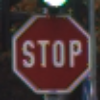

"Stop" sign detected


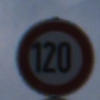

"Speed limit (120km/h)" sign detected


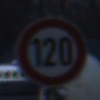

"Speed limit (120km/h)" sign detected


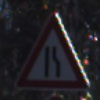

"Road narrows on the right" sign detected


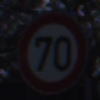

"Speed limit (70km/h)" sign detected


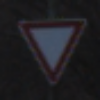

"Yield" sign detected


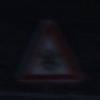

"Right-of-way at intersection" sign detected


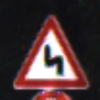

"Double curve" sign detected


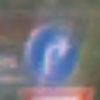

"Turn right ahead" sign detected


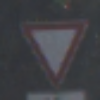

"Yield" sign detected


In [15]:
for i in range (0,10):
  image1 = Root + '/Test/' + str(chooseRandomImage())
  image = cv2.imread(image1)
  image = cv2.resize(image,(100,100))
  cv2_imshow(image)
  result = identify(image)